In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import sys
import re

Loading and pre-processing the training data (set-files)

In [20]:
eyes_open_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_EyesOpen_marked.set']
eyes_closed_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_60EpochsMarked.set']

## Preprocessing the data

In [21]:
set_files = eyes_open_files+eyes_closed_files

# Initialize empty lists to hold the data and labels
X_list = []  # Features (PSD data)
y_list = []  # Labels (eyes-open/eyes-closed)    
subject_ids = []


# Loop through each .set file (subject)
for file in set_files:
    # Load the .set file for the subject
    epochs = mne.io.read_epochs_eeglab(file)
    
    # 2. Load .set data as MATLAB struct
    mat = loadmat(file, struct_as_record=False, squeeze_me=True)
    rejmanual = mat['reject'].rejmanual  # array of 0 and 1

    # Brug det som labels direkte (0 = eyes closed)
    labels = np.array(rejmanual, dtype=int)

    # Compute the PSD for the current subject
    psd = epochs.compute_psd()

    # Get the PSD data and reshape it (flatten the 3D array to 2D for logistic regression)
    psd_data = psd.get_data()  # Shape: (n_epochs, n_channels, n_freqs)

    # checking and deleting epochs with missing values in psd data
    nan_epochs = np.isnan(psd_data).any(axis=(1,2))
    psd_data_cleaned = psd_data[~nan_epochs]
    labels_cleaned = labels[~nan_epochs]

    # extracting marked epochs 
    eyes_marked = labels_cleaned == 0
    psd_data_marked = psd_data_cleaned[eyes_marked]

    # assign labels based on file type
    if file in eyes_closed_files:
        final_labels = np.ones(psd_data_marked.shape[0], dtype=int)
    else:
        final_labels = np.zeros(psd_data_marked.shape[0], dtype=int)

    # flattening the data into a 2 dimensional matrix 
    psd_data_final = psd_data_marked.reshape(psd_data_marked.shape[0], -1)  # Shape: (n_epochs, n_channels * n_freqs)

    # Append the reshaped data to the list of features
    X_list.append(psd_data_final)
    y_list.append(final_labels)

    # Extract numeric subject ID (e.g. 10136) from the file path
    match = re.search(r'\\(\d{5})_', file)
    if match:
        subject_id = int(match.group(1))
    else:
        raise ValueError(f"Could not extract subject ID from path: {file}")

    # After creating psd_data_final
    subject_ids.extend([subject_id] * psd_data_final.shape[0])


# Concatenate data from all 10 subjects into one large dataset
X_combined = np.vstack(X_list)  # Shape: (total_epochs, n_channels * n_freqs)
y_combined = np.hstack(y_list)  # Shape: (total_epochs,)
subject_ids = np.array(subject_ids)

print(subject_ids)


Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1901 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set...
Not setting metadata
3123 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set...
Not setting metadata
185

# SVM

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, log_loss
)
from sklearn.model_selection import GridSearchCV


# Input
X = X_combined
y = y_combined
groups = subject_ids

# Setup
logo = LeaveOneGroupOut()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf']
}

log_losses = []
accuracies = []

all_probs_svm = []
all_y_true_folds_svm = []
all_y_pred_folds = []

# Cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(logo.split(X, y, groups), 1):
    print(f"Processing fold {fold_idx}/30...")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Inner CV for hyperparameter tuning
    inner_logo = LeaveOneGroupOut()
    group_train = groups[train_idx]
    svc = SVC(probability=False)

    clf = GridSearchCV(svc, param_grid, cv=inner_logo.split(X_train_scaled, y_train, group_train),
                       scoring='neg_log_loss', n_jobs=-1)
    clf.fit(X_train_scaled, y_train)

    print(f"  Best Params: {clf.best_params_}")

    # Calibrate best model on training data
    calibrated_model = CalibratedClassifierCV(clf.best_estimator_, method='sigmoid', cv='prefit')
    calibrated_model.fit(X_train_scaled, y_train)

    # Predictions
    prob = calibrated_model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (prob >= 0.5).astype(int)

    # Store for ensembling
    all_probs_svm.append(prob)
    all_y_true_folds_svm.append(y_test)
    all_y_pred_folds.append(y_pred)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, prob, labels=[0, 1])

    accuracies.append(acc)
    log_losses.append(loss)

    print(f"Fold {fold_idx} - Log Loss: {loss:.4f}, Accuracy: {acc:.4f}")


Processing fold 1/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 1 - Log Loss: 3.4887, Accuracy: 0.0233
Processing fold 2/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 2 - Log Loss: 0.3134, Accuracy: 0.8729
Processing fold 3/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 3 - Log Loss: 0.1767, Accuracy: 0.9620
Processing fold 4/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 4 - Log Loss: 0.5004, Accuracy: 0.7812
Processing fold 5/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 5 - Log Loss: 0.5424, Accuracy: 0.7895
Processing fold 6/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 6 - Log Loss: 0.1064, Accuracy: 0.9863
Processing fold 7/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 7 - Log Loss: 0.2038, Accuracy: 0.9808
Processing fold 8/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 8 - Log Loss: 0.1286, Accuracy: 0.9863
Processing fold 9/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 9 - Log Loss: 0.1170, Accuracy: 0.9902
Processing fold 10/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 10 - Log Loss: 0.5047, Accuracy: 0.8052
Processing fold 11/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 11 - Log Loss: 0.4752, Accuracy: 0.7037
Processing fold 12/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 12 - Log Loss: 0.4669, Accuracy: 0.7582
Processing fold 13/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 13 - Log Loss: 0.4099, Accuracy: 0.8171
Processing fold 14/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 14 - Log Loss: 0.4883, Accuracy: 0.8058
Processing fold 15/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 15 - Log Loss: 0.4725, Accuracy: 0.6364
Processing fold 16/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 16 - Log Loss: 0.2706, Accuracy: 0.9605
Processing fold 17/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 17 - Log Loss: 0.4953, Accuracy: 0.7590
Processing fold 18/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 18 - Log Loss: 0.9353, Accuracy: 0.5442
Processing fold 19/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 19 - Log Loss: 0.3502, Accuracy: 0.8254
Processing fold 20/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 20 - Log Loss: 0.0793, Accuracy: 1.0000
Processing fold 21/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 21 - Log Loss: 0.0868, Accuracy: 1.0000
Processing fold 22/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 22 - Log Loss: 0.4182, Accuracy: 0.7766
Processing fold 23/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 23 - Log Loss: 2.2357, Accuracy: 0.4545
Processing fold 24/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 24 - Log Loss: 0.5178, Accuracy: 0.7059
Processing fold 25/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 25 - Log Loss: 0.0716, Accuracy: 1.0000
Processing fold 26/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 26 - Log Loss: 0.3067, Accuracy: 0.9756
Processing fold 27/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 27 - Log Loss: 0.0908, Accuracy: 1.0000
Processing fold 28/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 28 - Log Loss: 0.4200, Accuracy: 0.8106
Processing fold 29/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 29 - Log Loss: 0.3594, Accuracy: 0.8204
Processing fold 30/30...


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


  Best Params: {'C': 0.1, 'kernel': 'rbf'}


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Fold 30 - Log Loss: 0.3363, Accuracy: 0.8372


In [44]:
print(clf.best_estimator_)

SVC(C=0.1)


In [37]:

from scipy.stats import chi2

# Concatenate all predictions and true labels from the 30 folds
y_true_all = np.concatenate(all_y_true_folds_svm)
y_pred_all_svm = np.concatenate(all_y_pred_folds)

# Create baseline predictions (always predict class 1)
majority_class = 1  # Always predicting "Eyes Closed"
y_pred_baseline = np.full_like(y_true_all, fill_value=majority_class)

# Determine correctness of each model per sample
svm_correct = y_pred_all_svm == y_true_all
baseline_correct = y_pred_baseline == y_true_all

# Construct contingency table values:
# b: SVM correct, baseline wrong
# c: SVM wrong, baseline correct
b = np.sum((svm_correct == True) & (baseline_correct == False))
c = np.sum((svm_correct == False) & (baseline_correct == True))

statistic = (abs(b-c)-1)**2 / (b+c) if b+c > 0 else 0
pvalue = 1-chi2.cdf(statistic, df=1)


# Interpretation
if pvalue < 0.05:
    print("✅ The SVM performs significantly differently from the baseline at the 0.05 level.")
else:
    print("❌ No significant difference in performance between SVM and the baseline.")

print(statistic) 
print(f"pvalue = {pvalue:.10e}")


✅ The SVM performs significantly differently from the baseline at the 0.05 level.
626.6288274831965
pvalue = 0.0000000000e+00


In [24]:
# Flatten lists to single arrays
all_y_true_flat = np.concatenate(all_y_true_folds_svm)
all_y_pred_flat = np.concatenate(all_y_pred_folds)
all_probs_flat = np.concatenate(all_probs_svm)

In [ ]:
probs_svm = np.concatenate(all_probs_svm)
np.save("probs_svm.npy", probs_svm)

In [ ]:
import joblib
joblib.dump(calibrated_model, "model_svm.joblib")

In [25]:
# Final Metrics
print("\n Cross-validation complete")
print(f"Mean Accuracy:  {np.mean(accuracies):.4f}")
print(f"Mean Log Loss:  {np.mean(log_losses):.4f}")

print("\n Classification Report:")
print(classification_report(all_y_true_flat, all_y_pred_flat, zero_division=0))


 Cross-validation complete
Mean Accuracy:  0.8123
Mean Log Loss:  0.5123

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1483
           1       0.82      0.88      0.85      1800

    accuracy                           0.83      3283
   macro avg       0.83      0.82      0.82      3283
weighted avg       0.83      0.83      0.83      3283



## Confusion Matrix SVM 

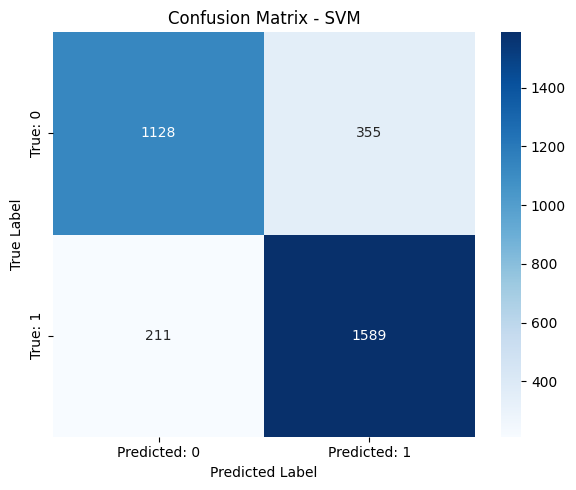

In [26]:
# Confusion Matrix Plot
cm = confusion_matrix(all_y_true_flat, all_y_pred_flat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["True: 0", "True: 1"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Fold per accuracy SVM 

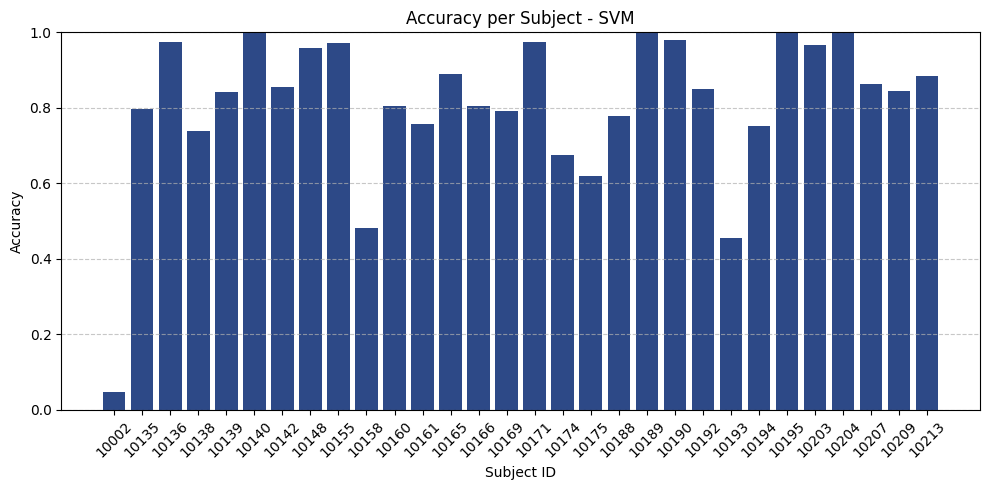

In [23]:
import matplotlib.pyplot as plt
import numpy as np

unique_subjects_ordered = np.unique(groups)

assert len(accuracies) == len(unique_subjects_ordered)

sorted_indices = np.argsort(unique_subjects_ordered)
sorted_subjects = unique_subjects_ordered[sorted_indices].astype(str)
sorted_accuracies = np.array(accuracies)[sorted_indices]


# Plot accuracies for each fold
plt.figure(figsize=(10, 5))
plt.bar(sorted_subjects, sorted_accuracies, color='#2d4987')
plt.title("Accuracy per Subject - SVM")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()


## ROC curve SVM

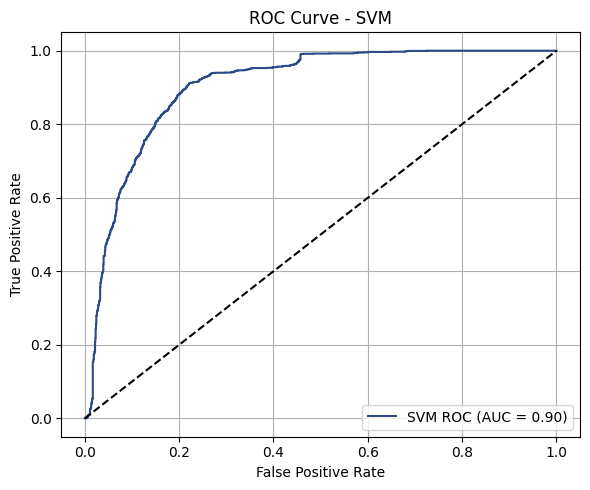

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 

all_probs_flat = np.concatenate(all_probs_svm)

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(all_y_true_flat, all_probs_flat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM ROC (AUC = {roc_auc:.2f})", color="#2d4987")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

✅ Running Random Forest with Leave-One-Subject-Out Cross-Validation...

Fold 1/30 - Subject: 10002
  Best parameters: {'max_depth': 10, 'n_estimators': 200}

Fold 2/30 - Subject: 10135


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 3/30 - Subject: 10136


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 4/30 - Subject: 10138


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 5/30 - Subject: 10139


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 6/30 - Subject: 10140


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 7/30 - Subject: 10142


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 8/30 - Subject: 10148


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 9/30 - Subject: 10155


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 10/30 - Subject: 10158


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 11/30 - Subject: 10160


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 12/30 - Subject: 10161


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 13/30 - Subject: 10165


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 14/30 - Subject: 10166


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 15/30 - Subject: 10169


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 16/30 - Subject: 10171


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 17/30 - Subject: 10174


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 18/30 - Subject: 10175


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 19/30 - Subject: 10188


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 20/30 - Subject: 10189


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 21/30 - Subject: 10190


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 22/30 - Subject: 10192


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 23/30 - Subject: 10193


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 24/30 - Subject: 10194


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 25/30 - Subject: 10195


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 26/30 - Subject: 10203


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 27/30 - Subject: 10204


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 28/30 - Subject: 10207


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 29/30 - Subject: 10209


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

Fold 30/30 - Subject: 10213


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


  Best parameters: {'max_depth': None, 'n_estimators': 100}

📊 Fold-by-fold Accuracy:
Fold 01: Accuracy = 0.1628
Fold 02: Accuracy = 0.5678
Fold 03: Accuracy = 0.9620
Fold 04: Accuracy = 0.8812
Fold 05: Accuracy = 0.9342
Fold 06: Accuracy = 1.0000
Fold 07: Accuracy = 0.9904
Fold 08: Accuracy = 0.8630
Fold 09: Accuracy = 0.9314
Fold 10: Accuracy = 0.4416
Fold 11: Accuracy = 0.8519
Fold 12: Accuracy = 0.7912
Fold 13: Accuracy = 0.8537
Fold 14: Accuracy = 0.6117
Fold 15: Accuracy = 0.8818
Fold 16: Accuracy = 0.9868
Fold 17: Accuracy = 0.7711
Fold 18: Accuracy = 0.7279
Fold 19: Accuracy = 0.9286
Fold 20: Accuracy = 0.9551
Fold 21: Accuracy = 1.0000
Fold 22: Accuracy = 0.8723
Fold 23: Accuracy = 0.4545
Fold 24: Accuracy = 0.8941
Fold 25: Accuracy = 0.9926
Fold 26: Accuracy = 0.9675
Fold 27: Accuracy = 0.9853
Fold 28: Accuracy = 0.6742
Fold 29: Accuracy = 0.9880
Fold 30: Accuracy = 0.8953

✅ Mean Accuracy across folds: 0.8273
Confusion Matrix:
 [[1275  208]
 [ 345 1455]]
Overall accuracy: 0.

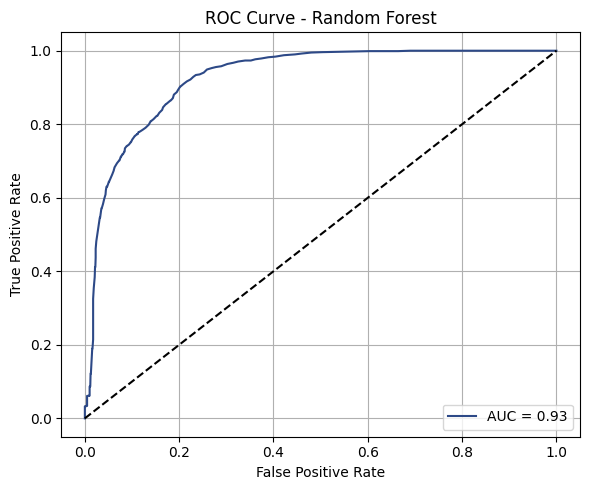

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, f1_score, recall_score, precision_score
)
from sklearn.preprocessing import StandardScaler

# Preprocessed data
X = X_combined
y = y_combined
groups = subject_ids
unique_subjects = np.unique(groups)

# Parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Storage
per_fold_accuracy = []
all_probs_rf = []
all_y_true_folds_rf = []
all_y_pred_folds_rf = []

print("✅ Running Random Forest with Leave-One-Subject-Out Cross-Validation...")

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(X, y, groups), 1):
    print(f"\nFold {fold_idx}/{len(np.unique(groups))} - Subject: {groups[test_idx][0]}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Inner CV groups
    inner_groups = groups[train_idx]
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=LeaveOneGroupOut().split(X_train_scaled, y_train, inner_groups),
        scoring='neg_log_loss',
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    print("  Best parameters:", grid_search.best_params_)

    # Predict with best model
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test_scaled)
    y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

    # Store
    all_y_true_folds_rf.append(y_test)
    all_y_pred_folds_rf.append(y_pred)
    all_probs_rf.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    per_fold_accuracy.append(acc)
    
    
y_true_all = np.concatenate(all_y_true_folds_rf)
y_pred_all = np.concatenate(all_y_pred_folds_rf)
y_prob_all = np.concatenate(all_probs_rf)


# --- Final Evaluation ---
print("\n📊 Fold-by-fold Accuracy:")
for i, acc in enumerate(per_fold_accuracy):
    print(f"Fold {i+1:02}: Accuracy = {acc:.4f}")

print(f"\n✅ Mean Accuracy across folds: {np.mean(per_fold_accuracy):.4f}")
random_forest_classification_report = classification_report(y_true_all, y_pred_all, target_names=["Eyes Open", "Eyes Closed"])

cm = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:\n", cm)

overall_acc = accuracy_score(y_true_all, y_pred_all)
print(f"Overall accuracy: {overall_acc}")

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="#2d4987")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
print("  Best parameters:", grid_search.best_params_)


  Best parameters: {'max_depth': None, 'n_estimators': 100}


In [39]:
from scipy.stats import chi2 
import numpy as np

# Concatenate all predictions and true labels
y_pred_all_rf = np.concatenate(all_y_pred_folds_rf)
y_true_all_rf = np.concatenate(all_y_true_folds_rf)

# Create baseline predictions (always predict class 1)
baseline_preds = np.full_like(y_true_all_rf, fill_value=1)

# Determine correctness
rf_correct = y_pred_all_rf == y_true_all_rf
baseline_correct = baseline_preds == y_true_all_rf

# Compute b and c for the contingency table
b = np.sum((rf_correct == True) & (baseline_correct == False))  # RF only correct
c = np.sum((rf_correct == False) & (baseline_correct == True))  # Baseline only correct

if b+c > 0:
    test_statistic2 = (abs(b-c)-1 ) **2 / (b+c)
    pvalue2 = 1-chi2.cdf(test_statistic2, df=1)
else:
    test_statistic2 = 0
    pvalue2 = 1


print(f"McNemar's test statistic = {test_statistic2:.4f}, p-value = {pvalue2:.4f}")

# Interpretation
if pvalue2 < 0.05:
    print("✅ The Random Forest model performs significantly differently from the baseline at the 0.05 level.")
else:
    print("❌ No significant performance difference between Random Forest and the baseline.")

McNemar's test statistic = 532.7414, p-value = 0.0000
✅ The Random Forest model performs significantly differently from the baseline at the 0.05 level.


In [13]:
print(f"\n✅ Mean Accuracy across folds: {np.mean(per_fold_accuracy):.4f}")


✅ Mean Accuracy across folds: 0.8273


In [14]:
print(random_forest_classification_report)

              precision    recall  f1-score   support

   Eyes Open       0.79      0.86      0.82      1483
 Eyes Closed       0.87      0.81      0.84      1800

    accuracy                           0.83      3283
   macro avg       0.83      0.83      0.83      3283
weighted avg       0.84      0.83      0.83      3283



## Accuracy per fold random forest 

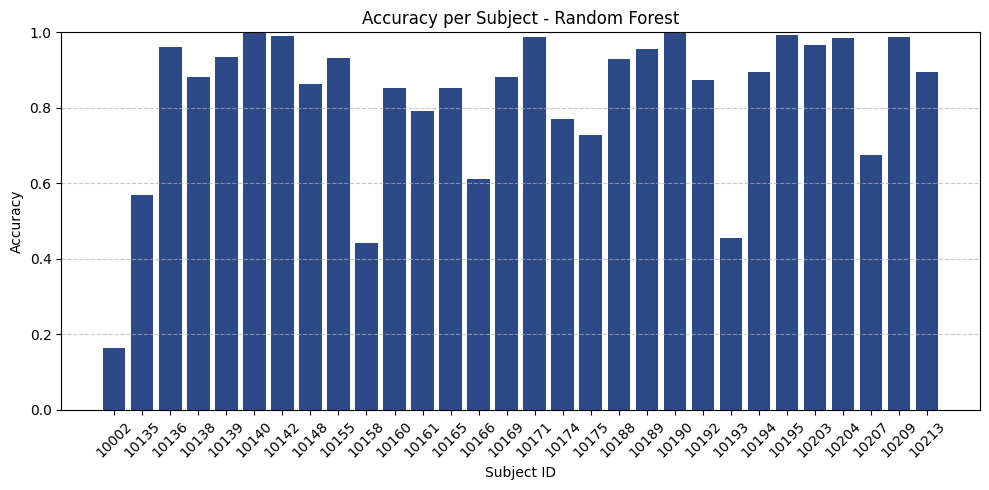

In [15]:
import matplotlib.pyplot as plt
import numpy as np

subject_ids = unique_subjects.astype(str) 
accuracies = np.array(per_fold_accuracy)

sorted_indices = np.argsort(unique_subjects)
sorted_subjects = subject_ids[sorted_indices]
sorted_accuracies = accuracies[sorted_indices]


# Plot accuracies for each fold
plt.figure(figsize=(10, 5))
plt.bar(sorted_subjects, sorted_accuracies, color='#2d4987')
plt.title("Accuracy per Subject - Random Forest")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()


## Confusion matrix random forest 

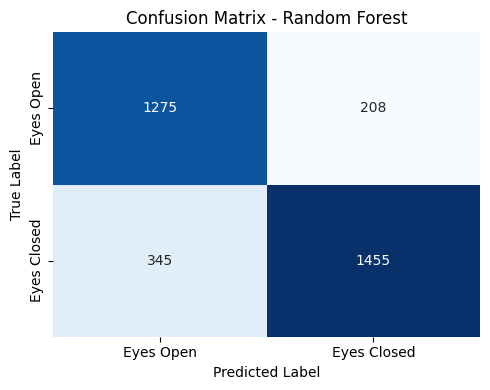

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Eyes Open", "Eyes Closed"],
            yticklabels=["Eyes Open", "Eyes Closed"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
probs_rf = np.concatenate(all_probs_rf)
np.save("probs_rf.npy", probs_rf)

joblib.dump(best_rf, "model_rf.joblib")

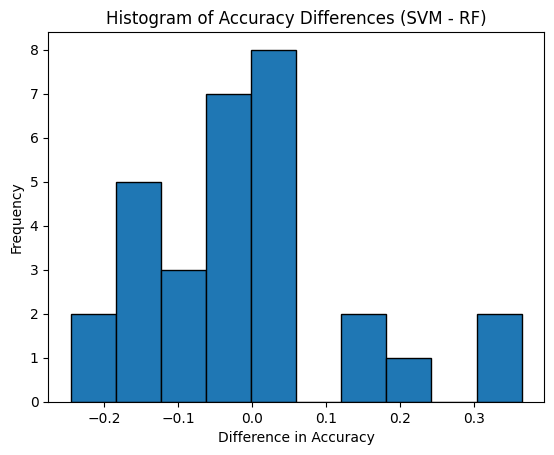

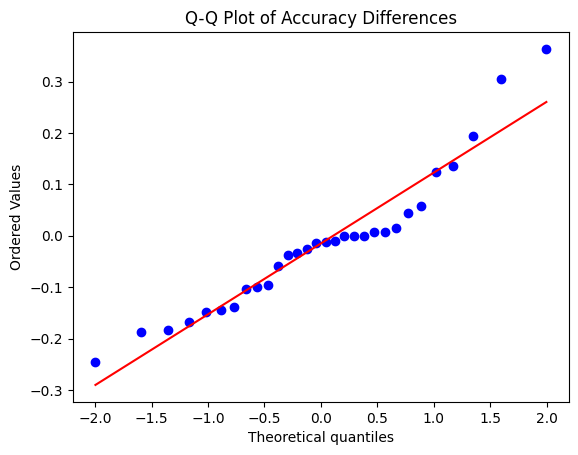

In [40]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Differences in accuracy per fold
acc_diff = np.array(accuracies) - np.array(per_fold_accuracy)

# Histogram
plt.hist(acc_diff, bins=10, edgecolor='k')
plt.title("Histogram of Accuracy Differences (SVM - RF)")
plt.xlabel("Difference in Accuracy")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
stats.probplot(acc_diff, dist="norm", plot=plt)
plt.title("Q-Q Plot of Accuracy Differences")
plt.show()


In [41]:
from scipy.stats import ttest_rel, wilcoxon
import numpy as np

# Convert to numpy arrays (optional but recommended)
acc_svm = np.array(accuracies)
acc_rf = np.array(per_fold_accuracy)

# Paired t-test
_, p_ttest = ttest_rel(acc_svm, acc_rf)
print(f"Paired t-test p-value: {p_ttest:.6f}")

# Wilcoxon test
_, p_wilcoxon = wilcoxon(acc_svm, acc_rf)
print(f"Wilcoxon test p-value: {p_wilcoxon:.6f}")


Paired t-test p-value: 0.556967
Wilcoxon test p-value: 0.248828


C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TMS-EEG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Undefi

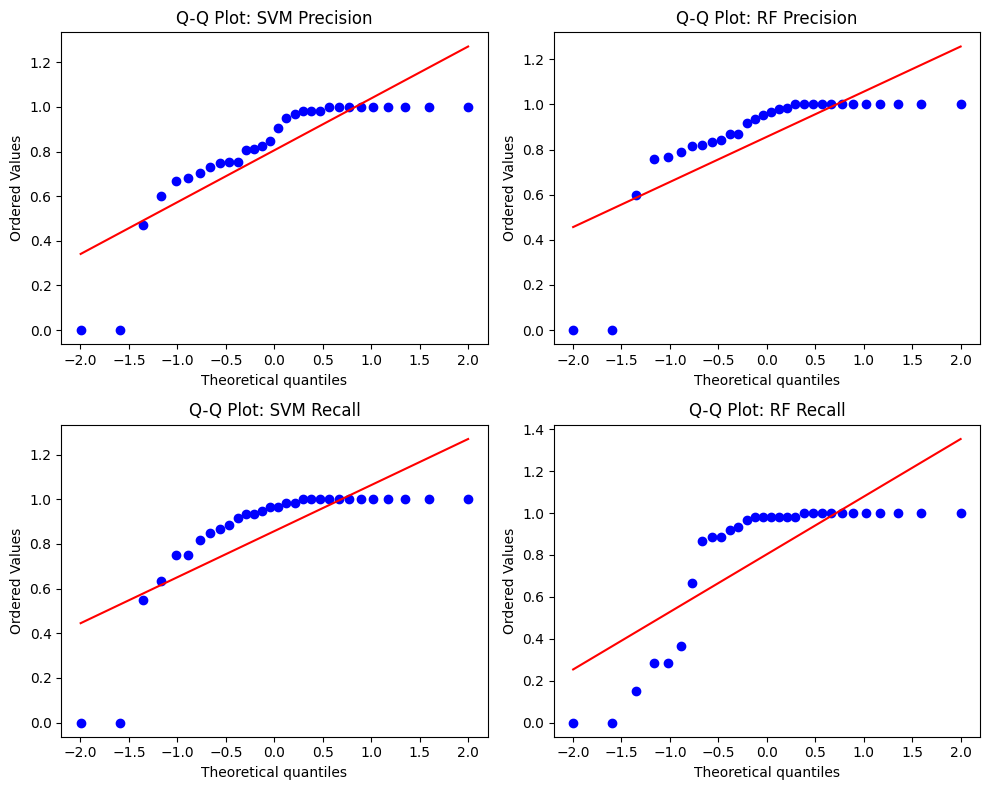

Paired t-test - Precision: t = -3.210, p = 0.0032
Paired t-test - Recall:    t = 1.349, p = 0.1879
Wilcoxon test - Precision: W = 26.500, p = 0.0020
Wilcoxon test - Recall:    W = 121.500, p = 0.6149


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score
from scipy.stats import ttest_rel, wilcoxon

# --- Compute per-fold metrics ---
svm_precisions = [precision_score(y_true, y_pred) for y_true, y_pred in zip(all_y_true_folds_svm, all_y_pred_folds)]
svm_recalls    = [recall_score(y_true, y_pred) for y_true, y_pred in zip(all_y_true_folds_svm, all_y_pred_folds)]
rf_precisions  = [precision_score(y_true, y_pred) for y_true, y_pred in zip(all_y_true_folds_rf, all_y_pred_folds_rf)]
rf_recalls     = [recall_score(y_true, y_pred) for y_true, y_pred in zip(all_y_true_folds_rf, all_y_pred_folds_rf)]

# --- Q-Q Plots ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

stats.probplot(svm_precisions, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Q-Q Plot: SVM Precision")

stats.probplot(rf_precisions, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Q-Q Plot: RF Precision")

stats.probplot(svm_recalls, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Q-Q Plot: SVM Recall")

stats.probplot(rf_recalls, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot: RF Recall")

plt.tight_layout()
plt.show()

# --- Paired t-tests ---
t_stat_prec, p_val_prec = ttest_rel(svm_precisions, rf_precisions)
t_stat_rec, p_val_rec = ttest_rel(svm_recalls, rf_recalls)

print(f"Paired t-test - Precision: t = {t_stat_prec:.3f}, p = {p_val_prec:.4f}")
print(f"Paired t-test - Recall:    t = {t_stat_rec:.3f}, p = {p_val_rec:.4f}")

# --- Wilcoxon tests (optional if Q-Q plots look normal) ---
w_stat_prec, p_val_prec_w = wilcoxon(svm_precisions, rf_precisions)
w_stat_rec, p_val_rec_w = wilcoxon(svm_recalls, rf_recalls)

print(f"Wilcoxon test - Precision: W = {w_stat_prec:.3f}, p = {p_val_prec_w:.4f}")
print(f"Wilcoxon test - Recall:    W = {w_stat_rec:.3f}, p = {p_val_rec_w:.4f}")
